# ClickHouse для аналитика

## MergeTree Family

### Описание задачи

Создайте таблицу аналогичную предыдущей с движком **ReplacingMergeTree** и ключом сортировки product_category 


Поля таблицы:

    sale_date: дата продажи
    product_id: идентификатор продукта
    product_category: категория продукта
    sale_amount: сумма продажи 
    sale_quantity: количество продаж
    customer_id: идентификатор покупателя 
    store_id: идентификатор магазина
    PARTITION BY: по месяцам по полю sale_date
    ORDER BY: product_category
    
    
После чего сгенерируйте данные и вставьте в таблицу, [код для генерации данных](https://colab.research.google.com/drive/1Lsqe9-cw4qSUJRJarbjnkS56VE_KoQgC?usp=sharing). Вставка данных аналогично предыдущей задаче:

    INSERT INTO <your_table_name>
    FORMAT JSONEachRow
    [{json_data}]
    
    
В качестве ответа укажите количество полученных строк.

### Создание таблицы

    CREATE TABLE my_table_replacing(
        sale_date Date,
        product_id Int64,
        product_category String,
        sale_amount Int64 DEFAULT 0,
        sale_quantity Int64,
        customer_id Int64 COMMENT 'идентификатор пользователя',
        store_id Int64
    )
      ENGINE = ReplacingMergeTree()
      PARTITION BY toYYYYMM(sale_date)
      ORDER BY (product_category)

### Генерация данных

Скрипт генерации случайных данных (получен по ссылке из задания):

In [1]:
# Функция генерации даты
from random import randrange, sample
from datetime import timedelta, datetime

import random

random.seed(41)

def random_date(start, end):
    """
    This function will return a random datetime between two datetime
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return (start + timedelta(seconds=random_second)).date()


d1 = datetime.strptime('1/1/2020', '%m/%d/%Y')
d2 = datetime.strptime('1/30/2020', '%m/%d/%Y')

# Код генерации данных
import json
import random
import string
import datetime

data = []
for i in range(100):
    item = {
        "sale_date": str(random_date(d1, d2)),
        "product_id": int(random.uniform(0, 1) * 100),
        "product_category": sample(['pr1', 'pr2', 'pr3'], 1)[0],
        "sale_amount": int(random.uniform(0, 1) * 100),
        "sale_quantity": int(random.uniform(0, 1) * 100),
        "customer_id": int(random.uniform(0, 1) * 100),
        "store_id": int(random.uniform(0, 1) * 100),
    }
    data.append(item)

json_text = json.dumps(data)
print(json_text)

[{"sale_date": "2020-01-19", "product_id": 33, "product_category": "pr1", "sale_amount": 90, "sale_quantity": 38, "customer_id": 89, "store_id": 28}, {"sale_date": "2020-01-14", "product_id": 38, "product_category": "pr3", "sale_amount": 76, "sale_quantity": 0, "customer_id": 24, "store_id": 99}, {"sale_date": "2020-01-01", "product_id": 43, "product_category": "pr1", "sale_amount": 98, "sale_quantity": 97, "customer_id": 31, "store_id": 25}, {"sale_date": "2020-01-29", "product_id": 5, "product_category": "pr3", "sale_amount": 3, "sale_quantity": 86, "customer_id": 84, "store_id": 21}, {"sale_date": "2020-01-18", "product_id": 73, "product_category": "pr1", "sale_amount": 55, "sale_quantity": 1, "customer_id": 9, "store_id": 14}, {"sale_date": "2020-01-09", "product_id": 5, "product_category": "pr2", "sale_amount": 22, "sale_quantity": 2, "customer_id": 57, "store_id": 43}, {"sale_date": "2020-01-03", "product_id": 30, "product_category": "pr1", "sale_amount": 10, "sale_quantity": 9, 

### Вставка данных в таблицу

INSERT INTO my_table_replacing
FORMAT JSONEachRow
[{"sale_date": "2020-01-19", "product_id": 33, "product_category": "pr1", "sale_amount": 90, "sale_quantity": 38, "customer_id": 89, "store_id": 28}, {"sale_date": "2020-01-14", "product_id": 38, "product_category": "pr3", "sale_amount": 76, "sale_quantity": 0, "customer_id": 24, "store_id": 99}, {"sale_date": "2020-01-01", "product_id": 43, "product_category": "pr1", "sale_amount": 98, "sale_quantity": 97, "customer_id": 31, "store_id": 25}, {"sale_date": "2020-01-29", "product_id": 5, "product_category": "pr3", "sale_amount": 3, "sale_quantity": 86, "customer_id": 84, "store_id": 21}, {"sale_date": "2020-01-18", "product_id": 73, "product_category": "pr1", "sale_amount": 55, "sale_quantity": 1, "customer_id": 9, "store_id": 14}, {"sale_date": "2020-01-09", "product_id": 5, "product_category": "pr2", "sale_amount": 22, "sale_quantity": 2, "customer_id": 57, "store_id": 43}, {"sale_date": "2020-01-03", "product_id": 30, "product_category": "pr1", "sale_amount": 10, "sale_quantity": 9, "customer_id": 2, "store_id": 65}, {"sale_date": "2020-01-20", "product_id": 23, "product_category": "pr1", "sale_amount": 13, "sale_quantity": 45, "customer_id": 72, "store_id": 42}, {"sale_date": "2020-01-14", "product_id": 53, "product_category": "pr1", "sale_amount": 65, "sale_quantity": 32, "customer_id": 13, "store_id": 6}, {"sale_date": "2020-01-02", "product_id": 72, "product_category": "pr3", "sale_amount": 87, "sale_quantity": 75, "customer_id": 10, "store_id": 66}, {"sale_date": "2020-01-07", "product_id": 89, "product_category": "pr2", "sale_amount": 65, "sale_quantity": 74, "customer_id": 60, "store_id": 41}, {"sale_date": "2020-01-05", "product_id": 96, "product_category": "pr1", "sale_amount": 22, "sale_quantity": 36, "customer_id": 45, "store_id": 72}, {"sale_date": "2020-01-22", "product_id": 8, "product_category": "pr3", "sale_amount": 27, "sale_quantity": 21, "customer_id": 68, "store_id": 27}, {"sale_date": "2020-01-16", "product_id": 80, "product_category": "pr3", "sale_amount": 37, "sale_quantity": 88, "customer_id": 75, "store_id": 73}, {"sale_date": "2020-01-11", "product_id": 55, "product_category": "pr1", "sale_amount": 3, "sale_quantity": 18, "customer_id": 66, "store_id": 6}, {"sale_date": "2020-01-12", "product_id": 54, "product_category": "pr3", "sale_amount": 15, "sale_quantity": 32, "customer_id": 22, "store_id": 67}, {"sale_date": "2020-01-06", "product_id": 82, "product_category": "pr2", "sale_amount": 59, "sale_quantity": 71, "customer_id": 55, "store_id": 49}, {"sale_date": "2020-01-18", "product_id": 89, "product_category": "pr2", "sale_amount": 2, "sale_quantity": 58, "customer_id": 94, "store_id": 63}, {"sale_date": "2020-01-25", "product_id": 51, "product_category": "pr1", "sale_amount": 41, "sale_quantity": 97, "customer_id": 96, "store_id": 4}, {"sale_date": "2020-01-29", "product_id": 69, "product_category": "pr1", "sale_amount": 68, "sale_quantity": 92, "customer_id": 90, "store_id": 30}, {"sale_date": "2020-01-08", "product_id": 25, "product_category": "pr2", "sale_amount": 61, "sale_quantity": 82, "customer_id": 86, "store_id": 27}, {"sale_date": "2020-01-29", "product_id": 41, "product_category": "pr2", "sale_amount": 79, "sale_quantity": 69, "customer_id": 23, "store_id": 50}, {"sale_date": "2020-01-29", "product_id": 44, "product_category": "pr2", "sale_amount": 18, "sale_quantity": 47, "customer_id": 7, "store_id": 49}, {"sale_date": "2020-01-28", "product_id": 82, "product_category": "pr1", "sale_amount": 61, "sale_quantity": 99, "customer_id": 81, "store_id": 53}, {"sale_date": "2020-01-10", "product_id": 41, "product_category": "pr2", "sale_amount": 32, "sale_quantity": 36, "customer_id": 17, "store_id": 86}, {"sale_date": "2020-01-11", "product_id": 16, "product_category": "pr3", "sale_amount": 51, "sale_quantity": 14, "customer_id": 65, "store_id": 53}, {"sale_date": "2020-01-02", "product_id": 23, "product_category": "pr2", "sale_amount": 62, "sale_quantity": 55, "customer_id": 52, "store_id": 24}, {"sale_date": "2020-01-10", "product_id": 4, "product_category": "pr2", "sale_amount": 58, "sale_quantity": 68, "customer_id": 48, "store_id": 56}, {"sale_date": "2020-01-02", "product_id": 18, "product_category": "pr1", "sale_amount": 27, "sale_quantity": 8, "customer_id": 65, "store_id": 93}, {"sale_date": "2020-01-22", "product_id": 1, "product_category": "pr2", "sale_amount": 10, "sale_quantity": 38, "customer_id": 6, "store_id": 83}, {"sale_date": "2020-01-16", "product_id": 66, "product_category": "pr3", "sale_amount": 37, "sale_quantity": 79, "customer_id": 8, "store_id": 37}, {"sale_date": "2020-01-18", "product_id": 16, "product_category": "pr2", "sale_amount": 17, "sale_quantity": 15, "customer_id": 8, "store_id": 84}, {"sale_date": "2020-01-16", "product_id": 30, "product_category": "pr2", "sale_amount": 32, "sale_quantity": 1, "customer_id": 5, "store_id": 42}, {"sale_date": "2020-01-06", "product_id": 89, "product_category": "pr1", "sale_amount": 96, "sale_quantity": 27, "customer_id": 84, "store_id": 77}, {"sale_date": "2020-01-17", "product_id": 97, "product_category": "pr2", "sale_amount": 77, "sale_quantity": 77, "customer_id": 40, "store_id": 65}, {"sale_date": "2020-01-26", "product_id": 70, "product_category": "pr3", "sale_amount": 69, "sale_quantity": 90, "customer_id": 24, "store_id": 81}, {"sale_date": "2020-01-14", "product_id": 52, "product_category": "pr1", "sale_amount": 83, "sale_quantity": 32, "customer_id": 28, "store_id": 92}, {"sale_date": "2020-01-15", "product_id": 27, "product_category": "pr1", "sale_amount": 6, "sale_quantity": 26, "customer_id": 57, "store_id": 15}, {"sale_date": "2020-01-27", "product_id": 54, "product_category": "pr3", "sale_amount": 1, "sale_quantity": 64, "customer_id": 23, "store_id": 92}, {"sale_date": "2020-01-21", "product_id": 59, "product_category": "pr3", "sale_amount": 45, "sale_quantity": 65, "customer_id": 3, "store_id": 20}, {"sale_date": "2020-01-15", "product_id": 61, "product_category": "pr1", "sale_amount": 17, "sale_quantity": 42, "customer_id": 8, "store_id": 56}, {"sale_date": "2020-01-23", "product_id": 85, "product_category": "pr3", "sale_amount": 4, "sale_quantity": 84, "customer_id": 11, "store_id": 40}, {"sale_date": "2020-01-04", "product_id": 55, "product_category": "pr3", "sale_amount": 89, "sale_quantity": 80, "customer_id": 68, "store_id": 81}, {"sale_date": "2020-01-01", "product_id": 8, "product_category": "pr3", "sale_amount": 56, "sale_quantity": 45, "customer_id": 43, "store_id": 27}, {"sale_date": "2020-01-02", "product_id": 15, "product_category": "pr3", "sale_amount": 64, "sale_quantity": 92, "customer_id": 81, "store_id": 78}, {"sale_date": "2020-01-27", "product_id": 40, "product_category": "pr2", "sale_amount": 47, "sale_quantity": 37, "customer_id": 95, "store_id": 91}, {"sale_date": "2020-01-26", "product_id": 69, "product_category": "pr1", "sale_amount": 68, "sale_quantity": 28, "customer_id": 18, "store_id": 98}, {"sale_date": "2020-01-14", "product_id": 79, "product_category": "pr2", "sale_amount": 49, "sale_quantity": 8, "customer_id": 52, "store_id": 16}, {"sale_date": "2020-01-04", "product_id": 8, "product_category": "pr2", "sale_amount": 93, "sale_quantity": 32, "customer_id": 24, "store_id": 87}, {"sale_date": "2020-01-07", "product_id": 98, "product_category": "pr1", "sale_amount": 17, "sale_quantity": 58, "customer_id": 78, "store_id": 8}, {"sale_date": "2020-01-04", "product_id": 55, "product_category": "pr1", "sale_amount": 78, "sale_quantity": 64, "customer_id": 9, "store_id": 98}, {"sale_date": "2020-01-18", "product_id": 24, "product_category": "pr1", "sale_amount": 14, "sale_quantity": 29, "customer_id": 94, "store_id": 74}, {"sale_date": "2020-01-10", "product_id": 71, "product_category": "pr1", "sale_amount": 54, "sale_quantity": 25, "customer_id": 21, "store_id": 8}, {"sale_date": "2020-01-25", "product_id": 84, "product_category": "pr2", "sale_amount": 34, "sale_quantity": 47, "customer_id": 34, "store_id": 38}, {"sale_date": "2020-01-15", "product_id": 14, "product_category": "pr1", "sale_amount": 2, "sale_quantity": 15, "customer_id": 43, "store_id": 45}, {"sale_date": "2020-01-08", "product_id": 94, "product_category": "pr2", "sale_amount": 23, "sale_quantity": 34, "customer_id": 11, "store_id": 28}, {"sale_date": "2020-01-13", "product_id": 85, "product_category": "pr2", "sale_amount": 21, "sale_quantity": 0, "customer_id": 63, "store_id": 61}, {"sale_date": "2020-01-23", "product_id": 74, "product_category": "pr3", "sale_amount": 71, "sale_quantity": 42, "customer_id": 6, "store_id": 69}, {"sale_date": "2020-01-23", "product_id": 22, "product_category": "pr1", "sale_amount": 61, "sale_quantity": 15, "customer_id": 64, "store_id": 55}, {"sale_date": "2020-01-05", "product_id": 1, "product_category": "pr2", "sale_amount": 59, "sale_quantity": 19, "customer_id": 95, "store_id": 34}, {"sale_date": "2020-01-20", "product_id": 23, "product_category": "pr2", "sale_amount": 89, "sale_quantity": 29, "customer_id": 39, "store_id": 43}, {"sale_date": "2020-01-15", "product_id": 20, "product_category": "pr2", "sale_amount": 18, "sale_quantity": 68, "customer_id": 63, "store_id": 3}, {"sale_date": "2020-01-16", "product_id": 57, "product_category": "pr2", "sale_amount": 70, "sale_quantity": 86, "customer_id": 4, "store_id": 59}, {"sale_date": "2020-01-21", "product_id": 27, "product_category": "pr1", "sale_amount": 67, "sale_quantity": 44, "customer_id": 44, "store_id": 76}, {"sale_date": "2020-01-12", "product_id": 80, "product_category": "pr3", "sale_amount": 76, "sale_quantity": 9, "customer_id": 14, "store_id": 5}, {"sale_date": "2020-01-18", "product_id": 80, "product_category": "pr3", "sale_amount": 67, "sale_quantity": 52, "customer_id": 59, "store_id": 99}, {"sale_date": "2020-01-17", "product_id": 82, "product_category": "pr2", "sale_amount": 37, "sale_quantity": 22, "customer_id": 7, "store_id": 57}, {"sale_date": "2020-01-02", "product_id": 0, "product_category": "pr3", "sale_amount": 40, "sale_quantity": 81, "customer_id": 70, "store_id": 45}, {"sale_date": "2020-01-01", "product_id": 53, "product_category": "pr3", "sale_amount": 72, "sale_quantity": 63, "customer_id": 99, "store_id": 49}, {"sale_date": "2020-01-20", "product_id": 4, "product_category": "pr3", "sale_amount": 10, "sale_quantity": 62, "customer_id": 13, "store_id": 66}, {"sale_date": "2020-01-11", "product_id": 68, "product_category": "pr1", "sale_amount": 10, "sale_quantity": 76, "customer_id": 88, "store_id": 38}, {"sale_date": "2020-01-07", "product_id": 15, "product_category": "pr1", "sale_amount": 17, "sale_quantity": 97, "customer_id": 3, "store_id": 1}, {"sale_date": "2020-01-20", "product_id": 33, "product_category": "pr3", "sale_amount": 95, "sale_quantity": 93, "customer_id": 25, "store_id": 86}, {"sale_date": "2020-01-17", "product_id": 27, "product_category": "pr2", "sale_amount": 12, "sale_quantity": 94, "customer_id": 44, "store_id": 23}, {"sale_date": "2020-01-22", "product_id": 99, "product_category": "pr1", "sale_amount": 3, "sale_quantity": 47, "customer_id": 59, "store_id": 99}, {"sale_date": "2020-01-26", "product_id": 41, "product_category": "pr1", "sale_amount": 26, "sale_quantity": 2, "customer_id": 91, "store_id": 69}, {"sale_date": "2020-01-13", "product_id": 0, "product_category": "pr3", "sale_amount": 69, "sale_quantity": 63, "customer_id": 45, "store_id": 87}, {"sale_date": "2020-01-13", "product_id": 75, "product_category": "pr1", "sale_amount": 21, "sale_quantity": 65, "customer_id": 77, "store_id": 16}, {"sale_date": "2020-01-09", "product_id": 48, "product_category": "pr1", "sale_amount": 63, "sale_quantity": 14, "customer_id": 15, "store_id": 63}, {"sale_date": "2020-01-22", "product_id": 75, "product_category": "pr3", "sale_amount": 25, "sale_quantity": 68, "customer_id": 22, "store_id": 94}, {"sale_date": "2020-01-23", "product_id": 62, "product_category": "pr3", "sale_amount": 33, "sale_quantity": 63, "customer_id": 80, "store_id": 30}, {"sale_date": "2020-01-21", "product_id": 5, "product_category": "pr2", "sale_amount": 51, "sale_quantity": 67, "customer_id": 91, "store_id": 75}, {"sale_date": "2020-01-27", "product_id": 72, "product_category": "pr3", "sale_amount": 68, "sale_quantity": 77, "customer_id": 90, "store_id": 58}, {"sale_date": "2020-01-27", "product_id": 35, "product_category": "pr2", "sale_amount": 46, "sale_quantity": 33, "customer_id": 51, "store_id": 19}, {"sale_date": "2020-01-10", "product_id": 72, "product_category": "pr2", "sale_amount": 8, "sale_quantity": 35, "customer_id": 99, "store_id": 19}, {"sale_date": "2020-01-03", "product_id": 78, "product_category": "pr1", "sale_amount": 83, "sale_quantity": 79, "customer_id": 39, "store_id": 75}, {"sale_date": "2020-01-13", "product_id": 82, "product_category": "pr1", "sale_amount": 36, "sale_quantity": 98, "customer_id": 16, "store_id": 39}, {"sale_date": "2020-01-05", "product_id": 29, "product_category": "pr2", "sale_amount": 52, "sale_quantity": 72, "customer_id": 1, "store_id": 37}, {"sale_date": "2020-01-03", "product_id": 78, "product_category": "pr3", "sale_amount": 10, "sale_quantity": 44, "customer_id": 71, "store_id": 53}, {"sale_date": "2020-01-29", "product_id": 56, "product_category": "pr3", "sale_amount": 8, "sale_quantity": 91, "customer_id": 98, "store_id": 4}, {"sale_date": "2020-01-15", "product_id": 6, "product_category": "pr1", "sale_amount": 99, "sale_quantity": 25, "customer_id": 19, "store_id": 63}, {"sale_date": "2020-01-11", "product_id": 93, "product_category": "pr1", "sale_amount": 43, "sale_quantity": 70, "customer_id": 44, "store_id": 26}, {"sale_date": "2020-01-06", "product_id": 91, "product_category": "pr1", "sale_amount": 14, "sale_quantity": 24, "customer_id": 89, "store_id": 49}, {"sale_date": "2020-01-27", "product_id": 37, "product_category": "pr3", "sale_amount": 15, "sale_quantity": 10, "customer_id": 70, "store_id": 57}, {"sale_date": "2020-01-11", "product_id": 58, "product_category": "pr2", "sale_amount": 6, "sale_quantity": 91, "customer_id": 75, "store_id": 2}, {"sale_date": "2020-01-20", "product_id": 83, "product_category": "pr3", "sale_amount": 83, "sale_quantity": 36, "customer_id": 8, "store_id": 64}, {"sale_date": "2020-01-02", "product_id": 58, "product_category": "pr2", "sale_amount": 21, "sale_quantity": 46, "customer_id": 58, "store_id": 22}, {"sale_date": "2020-01-14", "product_id": 55, "product_category": "pr1", "sale_amount": 80, "sale_quantity": 86, "customer_id": 85, "store_id": 56}, {"sale_date": "2020-01-19", "product_id": 70, "product_category": "pr2", "sale_amount": 9, "sale_quantity": 62, "customer_id": 27, "store_id": 88}, {"sale_date": "2020-01-11", "product_id": 20, "product_category": "pr2", "sale_amount": 38, "sale_quantity": 9, "customer_id": 37, "store_id": 44}]

### Расчёт искомого значения

Количество полученных строк


    SELECT COUNT(*)
    FROM my_table_replacing 

    3

### Описание созданной таблицы

    DESCRIBE TABLE my_table_replacing

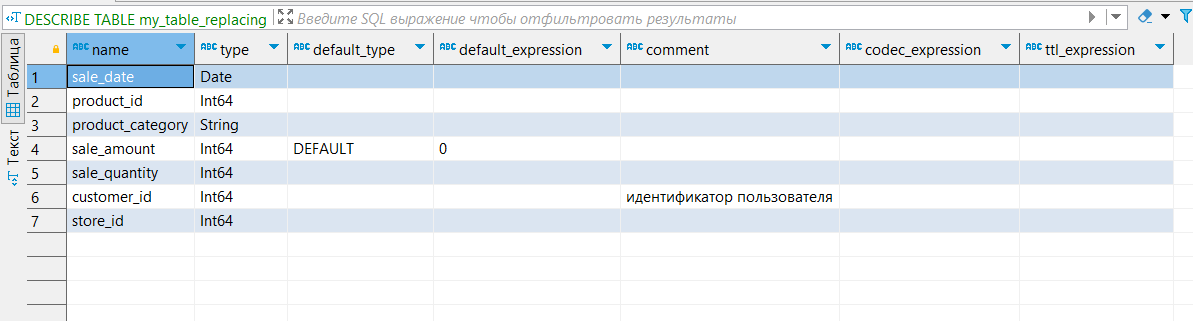

___________________________________________________________________________________________________________________________
Заметки вела: аналитик данных Малахова Наталья

Мой телеграм-канал: [Дневник аналитика](https://t.me/diary_musician_analyst "Дневник аналитика")

Портфолио: [GitHub](https://github.com/Malakhova-Natalya "GitHub")

Хабр: [Habr](https://habr.com/ru/users/Malakhova-Natalya/publications/articles/ "Habr")


Спасибо за внимание!